<a href="https://colab.research.google.com/github/maskaljunas/Affective_Signals/blob/main/affectiveSignalsBreathing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Affective Signals V - Breathing
----
<span style="color:Blue">**Through this notebook we hope you get an hands on approach to the seminar. 
    Below you will find code snippets and theory that will help you apply the various libraries that have been introduced to you in the course.**</span>


### In this Notebook we want to analyse breathing related data from your prerecorded videos. However, due to some video quality issues (no breathing movements seen) you will analyse not your own video but one provided for you :-).

### **The tasks for this sheet will be an open task meaning you will have to think about what statistical aspects you want to look at for a particular feature. (At least one as you did for the previous Notebooks)**

In [2]:
# mount your Google Drive, where your video is located

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import collections
from datetime import timedelta

### Theoretical Background



In the last week, you've learned that the healthy heart has an irregular beat-to-beat rhythm. This rhythm variability reflects the interplay of the autonomic nervous system: During inhalation of air into the lungs the sympathicus has a higher impact on the heart due to inhibition of the [vagotonia](https://en.wikipedia.org/wiki/Vagotonia). Hence, the heart rate synchronizes with the respiratory cycle, meaning it increases with inspiration and decreases with expiration. It is called respiratory sinus arrhythmia ([RSA](https://pubmed.ncbi.nlm.nih.gov/14769752/)) and can be well seen during sleep and in young children.

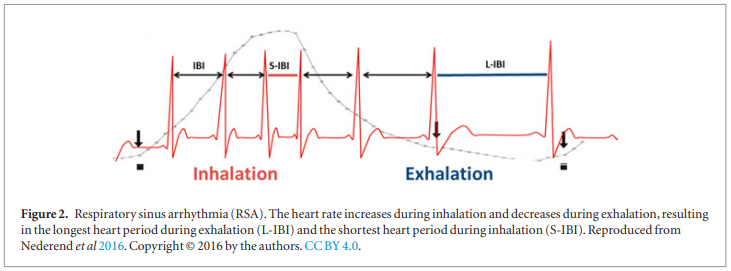

Respiration rate extraction is categorized into three modalities: extraction from physiological signals (ECG, PPG,...), based on respiratory movements (upper body), based on airflow (thermal camera).




### rPPG based estimation
The respiratory rate can be derived from the variations in the amplitudes or the beat-to-beat intervals of a physiological signal (if the heart rate is at least two times greater than the respiration rate).

[Source](https://pdfs.semanticscholar.org/7154/7713f4ce911b6b57047063ae7f6978a76ad6.pdf?_ga=2.266920713.606880244.1625485083-1905870195.1621960846)

### **Motion based Estimation**

We are going to estimate the respiration information based on breathing motion detection with the python library [respmon](https://github.com/kevroy314/respmon). The library was designed with goal for low-cost monitoring of (critical) animals in shelters.

Respmon takes the ROI which reflects the right frequency for a respiration signal (rhythmic movements). This is done in the calibration step by using [eulerian magnification](http://people.csail.mit.edu/mrub/evm/).  

(*For your videos, the calibration step unfortunately did not worked out properly. For example, the ROI was defined as a region which did not reflect your breathing movement but rather a jacket in the background.*)

Based on the resulting temporal frequency pyramid, a heatmap can be constructed for the locations in the image where a particular frequency is common (middle figure upper row). "This image is then thresholded and the largest contour is isolated for later measurement. This largest contour's bounding box is the ROI." [[respmon]](https://github.com/kevroy314/respmon)

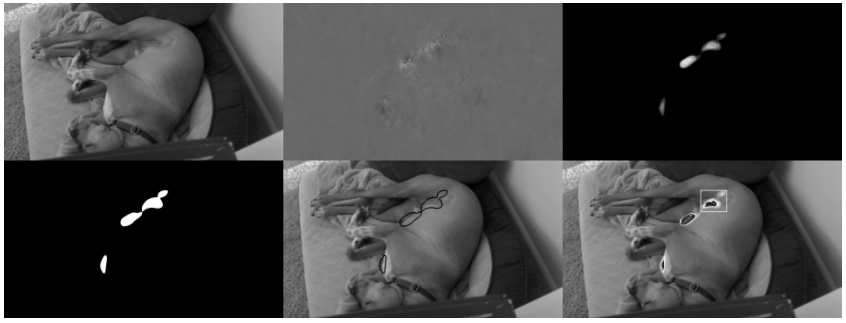

"Motion Measurement is performed in one of two ways , either a simple average of the ROI pixel values is used or [optical flow](https://docs.opencv.org/3.3.1/d7/d8b/tutorial_py_lucas_kanade.html) is performed.

For optical flow, a set of feature points are identified. These feature points are then tracked across frames and the difference between consecutive points becomes a raw motion signal. The first eigenvector of this raw motion signal is extracted at each time step and used to transform the 2D motion vector average into a 1D signal which can be used as a measure of the motion along the primary axis of motion. This method is more computationally expensive but produces a signal which represents the net motion in units of pixels, making it an easier signal within which to detect errors." [[respmon]](https://github.com/kevroy314/respmon)



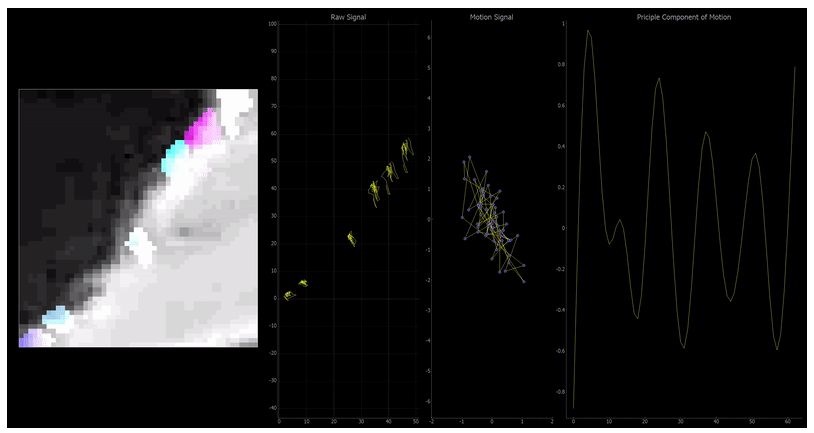

The resulting motion signal is filtered and a peak detection algorithm is applied. The respiration frequency is then calculated for the respective intervals. 

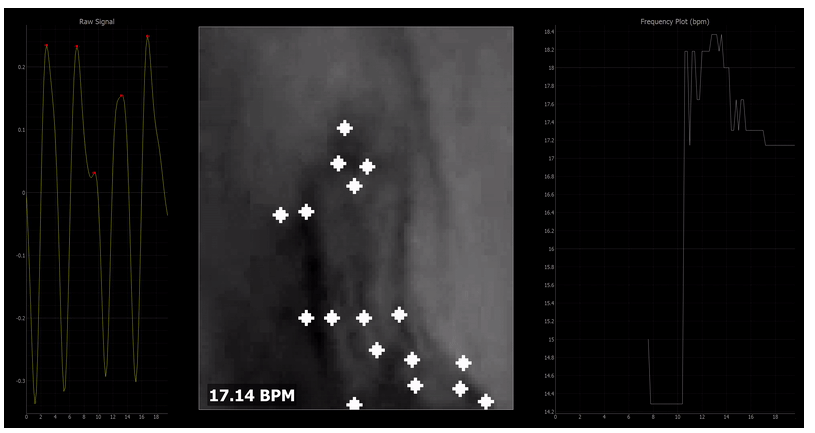

# **Task 5.1**

**Have a look at your own video again and try to find regions of interest where the breathing movements can be clearly seen or is not seen by us but can be extracted e.g. by  eulerian magnification. If you find some ROI's, explain why you assume you can extract respiratory information there and what problems could arise. If you don't find some ROI's, then try to explain why and what are the obstacles. What should have been controlled during recording, such that the estimation can be performed.** 

In [3]:
# video display
def show_local_mp4_video(file_name, width=640, height=480):
  import io
  import base64
  from IPython.display import HTML
  video_encoded = base64.b64encode(io.open(file_name, 'rb').read())
  return HTML(data='''<video width="{0}" height="{1}" alt="test" controls>
                        <source src="data:video/mp4;base64,{2}" type="video/mp4" />
                      </video>'''.format(width, height, video_encoded.decode('ascii')))

In [ ]:
show_local_mp4_video("path to your video", width=960, height=720)

In [ ]:
# Task 5.1

# your observations:


### Analysis of the video:

In [ ]:
# display the video

show_local_mp4_video('/content/drive/MyDrive/video.mp4', width=960, height=720)



Overview of heart rate and respiration rate ranges for healthy subjects at rest.

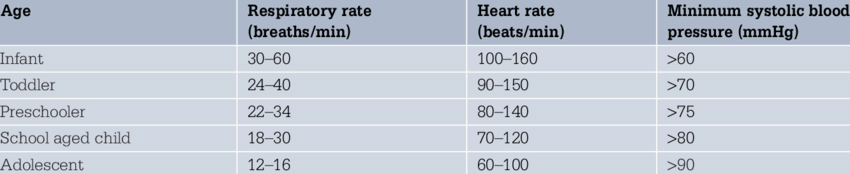

[Source](https://www.researchgate.net/publication/44614428_Assessment_of_the_unwell_child)

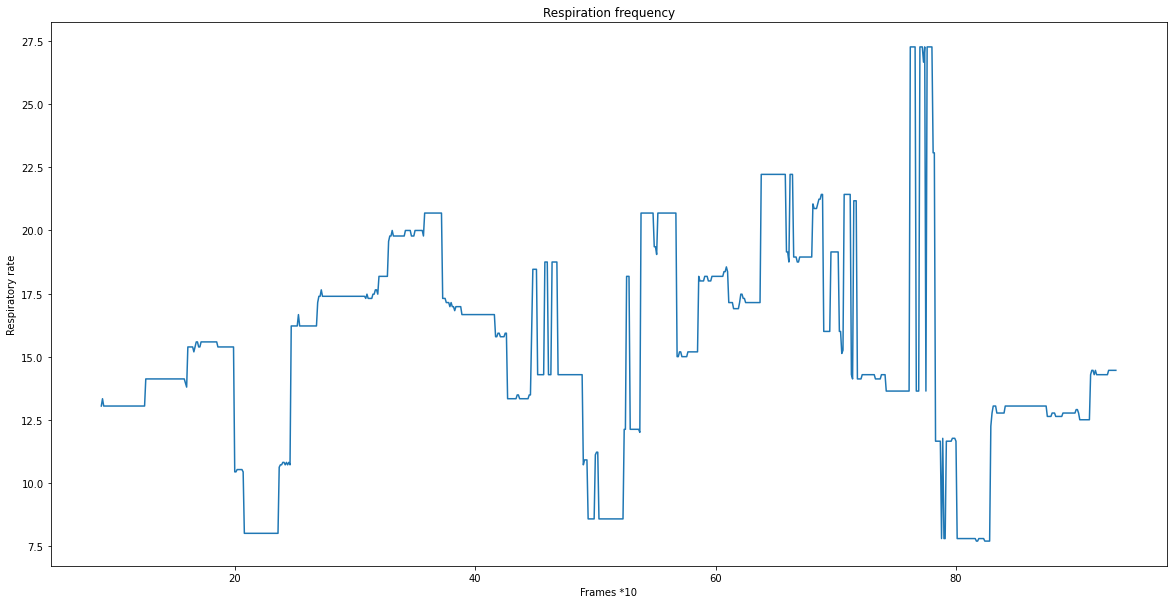

In [12]:
# Plot respiration rate 

respmon_data = np.load('/content/drive/MyDrive/respiration_rate.mp4.npy')

plt.plot(respmon_data[:,0],respmon_data[:,1])
plt.xlabel("Frames *10")
plt.ylabel("Respiratory rate")
plt.title('Respiration frequency')
plt.rcParams['figure.figsize'] = [20, 10]
plt.show()

# **Task 5.2**

**Descriptive analysis of the respiration rate:** 
Calculate some interesting aspects about the respiration frequency.

In [ ]:
# your code:

**Breathing pattern**

In the respmon library the respiration frequency is derived from the motion data, however we additionally estimated the breathing movements with the ["OpticalFlowRR"](https://github.com/ynandwan/OpticalFlowRR) package which is based on the following paper [[1]](https://ieeexplore.ieee.org/document/7789974).




Abstract overview of breathing pattern and its respective behavioral meaning.

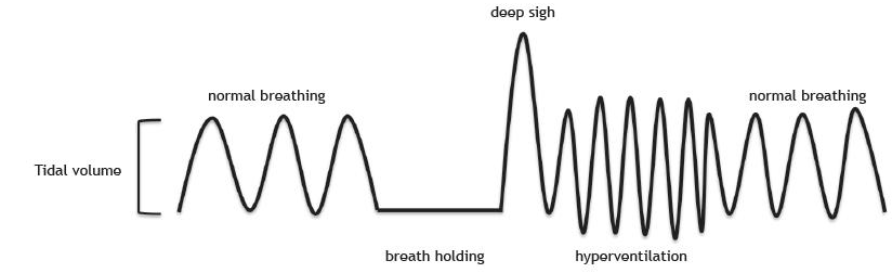

[Source](https://www.scielo.br/j/jbpneu/a/NBZcwpX45rBKS5gDbHFLNXr/?lang=en#)

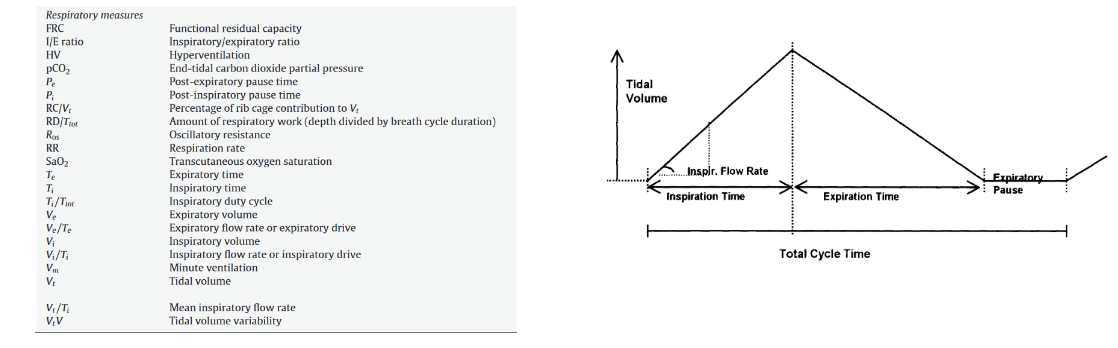

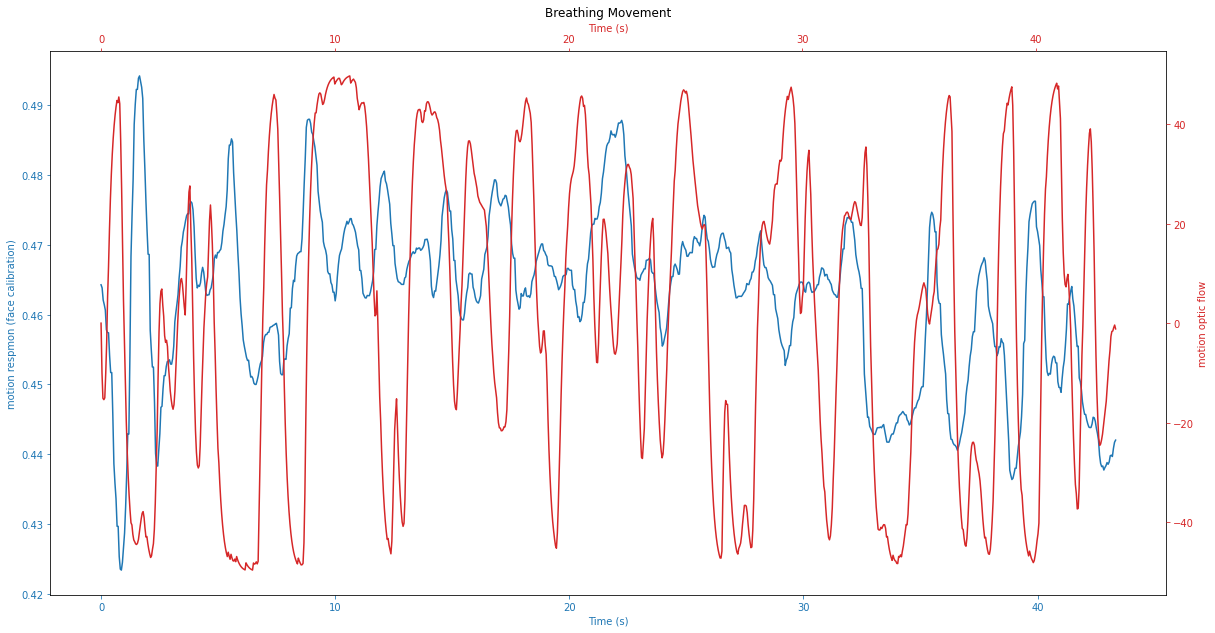

In [8]:
# plot two different libraries for optic flow based breathing estimation

ba_motion_opticflow = np.load('/content/drive/MyDrive/opticflowRR.npy')
ba_motion_respmon = np.load('/content/drive/MyDrive/motion.mp4.npy')

fig=plt.figure()
ax=fig.add_subplot(111, label="1")
ax2=fig.add_subplot(111, label="2", frame_on=False)

FPS = 21.9
frame_count = len(ba_motion_respmon)
x_axis_respmon = []
for item in range(frame_count):
  time_delta = timedelta(seconds=(item / FPS))
  x_axis_respmon.append(time_delta.total_seconds())

ax.plot(x_axis_respmon,ba_motion_respmon[:,1], color="C0")
ax.set_xlabel("Time (s)", color="C0")
ax.set_ylabel("motion respmon (face calibration)", color="C0")
ax.tick_params(axis='x', colors="C0")
ax.tick_params(axis='y', colors="C0")

FPS = 25
frame_count = len(ba_motion_opticflow)
x_axis_opticflow = []
for item in range(frame_count):
  time_delta = timedelta(seconds=(item / FPS))
  x_axis_opticflow.append(time_delta.total_seconds())

ax2.plot(x_axis_opticflow, ba_motion_opticflow, color="C3")
ax2.xaxis.tick_top()
ax2.yaxis.tick_right()
ax2.set_xlabel("Time (s)", color="C3")
ax2.set_ylabel("motion optic flow", color="C3")
ax2.xaxis.set_label_position('top') 
ax2.yaxis.set_label_position('right') 
ax2.tick_params(axis='x', colors="C3")
ax2.tick_params(axis='y', colors="C3")
plt.title('Breathing Movement')
plt.rcParams['figure.figsize'] = [20, 10]

plt.show()

# **Task 5.3**

Detect breathing pattern:

Have a look at the breathing movement plot of both methods and try to evaluate which of them better reflects the breathing behavior.

Try to detect specific breathing patterns. Do they correspond to the behavior in the video? 

Use one of the methods to calculate the presented respiratory measurements.

**Hint:** you can use [findpeaks](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.find_peaks.html) and mirror the signal (signal*-1) in order to find he needed points.

In [ ]:
# your observations: 

In [ ]:
# your code:

## HR and RR

The average heart rate is 74.4906338778409


Text(0.5, 1.0, 'BPM -Method - GREEN')

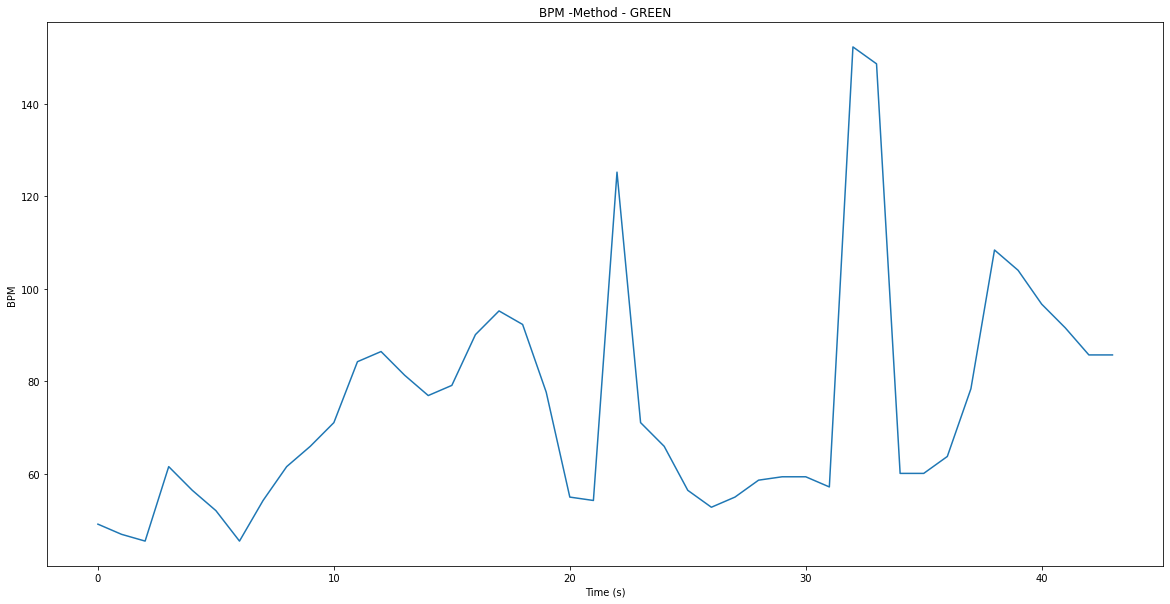

In [9]:
# visualize the heart rate of the video
bpmES_green = np.load('/content/drive/MyDrive/bpmES_green.npy')
timesES_green = np.load('/content/drive/MyDrive/timesES_green.npy')

print(f"The average heart rate is {np.average(bpmES_green[0])}")
plt.plot(timesES_green,bpmES_green[0][:])
plt.ylabel("BPM")
plt.xlabel("Time (s)")
plt.title('BPM -Method - GREEN')

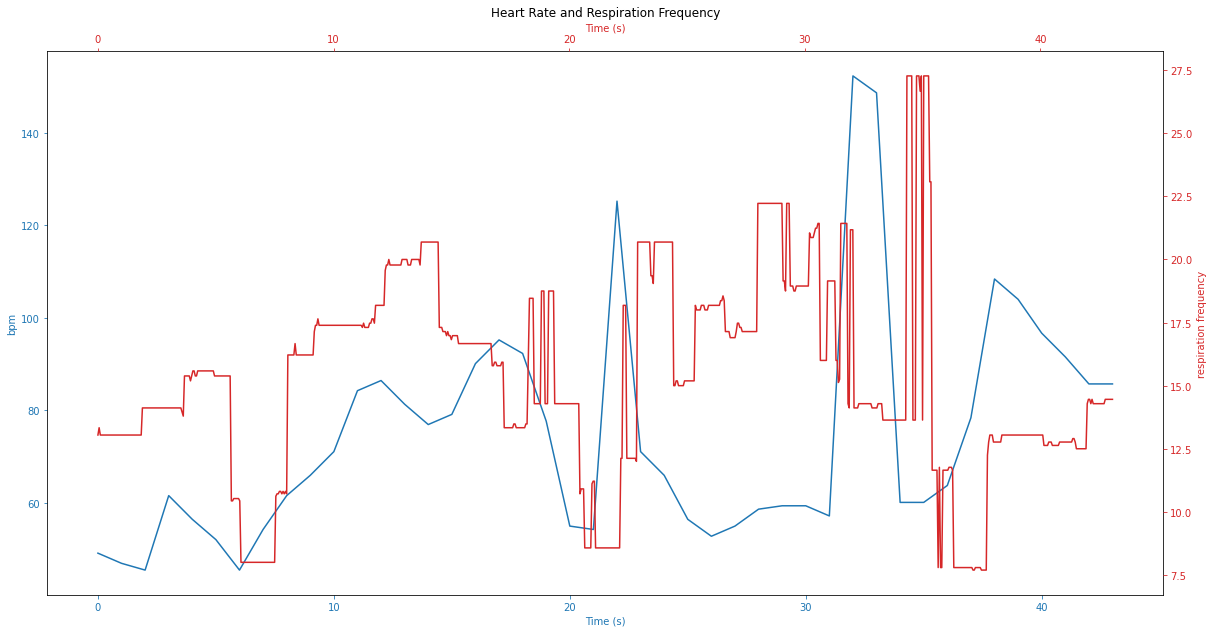

In [10]:
# overlay plot of heart rate and respiration frequency

fig=plt.figure()
ax=fig.add_subplot(111, label="1")
ax2=fig.add_subplot(111, label="2", frame_on=False)

FPS = 19.6
frame_count = len(respmon_data[:,1])
x_axis_respmon = []
for item in range(frame_count):
  time_delta = timedelta(seconds=(item / FPS))
  x_axis_respmon.append(time_delta.total_seconds())

ax.plot(bpmES_green[0][:], color="C0")
ax.set_xlabel("Time (s)", color="C0")
ax.set_ylabel("bpm", color="C0")
ax.tick_params(axis='x', colors="C0")
ax.tick_params(axis='y', colors="C0")

ax2.plot(x_axis_respmon,respmon_data[:,1], color="C3")
ax2.xaxis.tick_top()
ax2.yaxis.tick_right()
ax2.set_xlabel("Time (s)", color="C3")
ax2.set_ylabel("respiration frequency", color="C3")
ax2.xaxis.set_label_position('top') 
ax2.yaxis.set_label_position('right') 
ax2.tick_params(axis='x', colors="C3")
ax2.tick_params(axis='y', colors="C3")
plt.title('Heart Rate and Respiration Frequency')

plt.show()

# **Task 5.4**

**Describe, if both signals might have a relationship in their behavior. Look for parts where they support your knowledge of heart rate and breathing activity.**

In [ ]:
# your observations: 

## HRV and RR

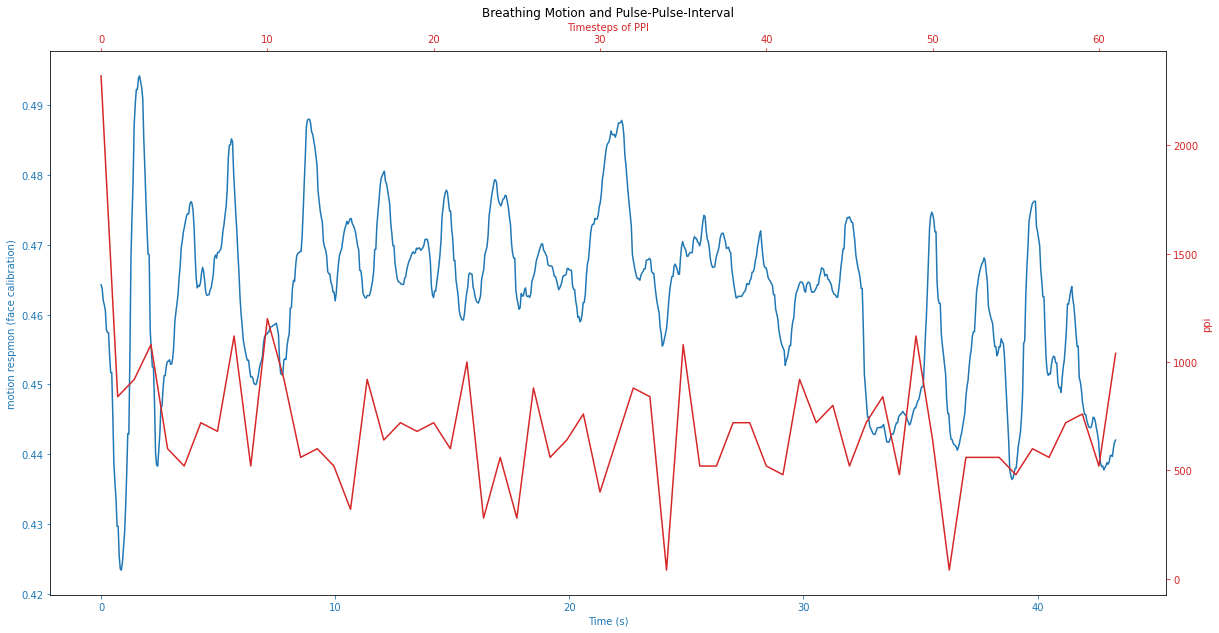

In [11]:
# ppi and breathing motion

ppi = np.load('/content/drive/MyDrive/ppi.npy')
#ppi = np.load('path to ppi.npy')

fig=plt.figure()
ax=fig.add_subplot(111, label="1")
ax2=fig.add_subplot(111, label="2", frame_on=False)
 
# use one of the methods
# motion_signal = ba_motion_opticflow 
motion_signal = ba_motion_respmon[:,1]

FPS = 21.9
frame_count = len(motion_signal)
x_axis_motionsingal = []
for item in range(frame_count):
  time_delta = timedelta(seconds=(item / FPS))
  x_axis_motionsingal.append(time_delta.total_seconds())

ax.plot(x_axis_motionsingal,motion_signal, color="C0")
ax.set_xlabel("Time (s)", color="C0")
ax.set_ylabel("motion respmon (face calibration)", color="C0")
ax.tick_params(axis='x', colors="C0")
ax.tick_params(axis='y', colors="C0")

ax2.plot( ppi, color="C3")
ax2.xaxis.tick_top()
ax2.yaxis.tick_right()
ax2.set_xlabel("Timesteps of PPI", color="C3")
ax2.set_ylabel("ppi", color="C3")
ax2.xaxis.set_label_position('top') 
ax2.yaxis.set_label_position('right') 
ax2.tick_params(axis='x', colors="C3")
ax2.tick_params(axis='y', colors="C3")
plt.rcParams['figure.figsize'] = [20, 10]
plt.title('Breathing Motion and Pulse-Pulse-Interval')

plt.show()

# **Task 5.5**

**Describe, if both signals might have a relationship in their behavior based on RSA. Look for parts where they support your knowledge of heart rate variability and breathing activity.**

In [ ]:
# your observations: